In [1]:
#Exercise 1
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34, "Kuli", "Workout", "Laki-Laki"), ("Budi", 23, "Pelajar", "Belajar", "Perempuan"), ("Citra", 29, "Guru", "Berenang", "Laki-laki"), ("Dina", 45, "Satpam", "Boxing", "Perempuan")]
columns = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
25/09/02 20:23:31 WARN Utils: Your hostname, hakkan-VirtualBox, resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/09/02 20:23:31 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/09/02 20:23:32 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
                                                                                

+-----+----+---------+--------+---------+
| Nama|Usia|Pekerjaan|    Hobi|   Gender|
+-----+----+---------+--------+---------+
|  Ali|  34|     Kuli| Workout|Laki-Laki|
| Budi|  23|  Pelajar| Belajar|Perempuan|
|Citra|  29|     Guru|Berenang|Laki-laki|
| Dina|  45|   Satpam|  Boxing|Perempuan|
+-----+----+---------+--------+---------+



In [2]:
#Exercise 2
from pyspark.sql import SparkSession

# Memulai Spark session
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

# Membuat DataFrame sederhana
data = [("Ali", 34), ("Budi", 23), ("Citra", 29), ("Dina", 45)]
columns = ["Nama", "Usia"]
df = spark.createDataFrame(data, columns)

# Menampilkan DataFrame
df.show()

# Filtering data
df_filtered = df.filter(df['Usia'] > 30)
df_filtered.show()

# Menghitung rata-rata usia
from pyspark.sql.functions import avg
df.groupBy().agg(avg("Usia")).show()

# Mengurutkan data berdasarkan usia
df_sorted = df.orderBy("Usia", ascending=False)
df_sorted.show()

+-----+----+
| Nama|Usia|
+-----+----+
|  Ali|  34|
| Budi|  23|
|Citra|  29|
| Dina|  45|
+-----+----+

+----+----+
|Nama|Usia|
+----+----+
| Ali|  34|
|Dina|  45|
+----+----+

+---------+
|avg(Usia)|
+---------+
|    32.75|
+---------+

+-----+----+
| Nama|Usia|
+-----+----+
| Dina|  45|
|  Ali|  34|
|Citra|  29|
| Budi|  23|
+-----+----+



In [3]:
#Exercise 3
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"],
               "Usia": [34, 23, 29, 45],
               "Hobi": ["Workout", "Boxing", "Bernyanyi", "Bermain basket"]}
df_pandas = pd.DataFrame(data_pandas)

df_filtered = df_pandas[df_pandas['Usia'] > 30]
df_filtered

# Menampilkan DataFrame Pandas

,Nama,Usia,Hobi
0,Ali,34,Workout
3,Dina,45,Bermain basket


    Nama  Usia Tempat Tinggal
0    Ali    34        Jakarta
1   Budi    23          Jogja
2  Citra    29        Kebumen
3   Dina    45       Magelang
            Usia
count   4.000000
mean   32.750000
std     9.322911
min    23.000000
25%    27.500000
50%    31.500000
75%    36.750000
max    45.000000


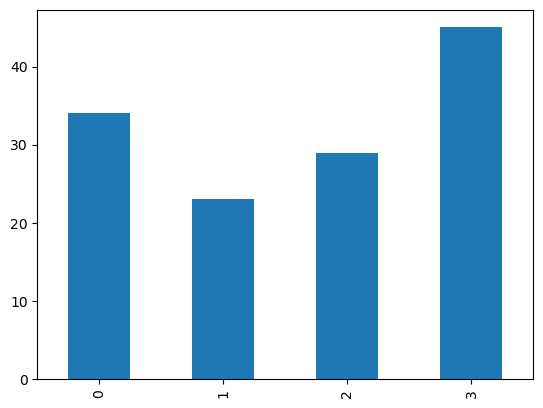

In [4]:
#Exercise 4
import pandas as pd

# Membuat DataFrame Pandas
data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Usia": [34, 23, 29, 45]}
df_pandas = pd.DataFrame(data_pandas)

# Membuat DataFrame kedua
data_pandas_2 = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Tempat Tinggal": ["Jakarta", "Jogja", "Kebumen", "Magelang"]}
df_pandas_2 = pd.DataFrame(data_pandas_2)

# Join antara dua DataFrame
df_joined = pd.merge(df_pandas, df_pandas_2, on="Nama")
print(df_joined)

# Menghitung statistik deskriptif
print(df_pandas.describe())

# Plotting Data
import matplotlib.pyplot as plt
df_pandas['Usia'].plot(kind='bar')
plt.show()

In [5]:
from pyspark.sql import SparkSession
import pandas as pd

# Pyspark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data_spark = [
    ("Ali", 34, "Kuli", "Workout", "Laki-Laki"),
    ("Budi", 23, "Pelajar", "Belajar", "Perempuan"),
    ("Citra", 29, "Guru", "Berenang", "Laki-laki"),
    ("Dina", 45, "Satpam", "Boxing", "Perempuan")
]
columns_spark = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

df_pyspark_to_pandas = df_spark.toPandas()

new_data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Tempat Tinggal": ["Jakarta", "Jogja", "Kebumen", "Magelang"]}
df_new_pandas = pd.DataFrame(new_data_pandas)

df_merge = pd.merge(df_pyspark_to_pandas, df_new_pandas, on="Nama")
print("DataFrame yang digabungkan dari PySpark dan Pandas:")
print(df_merge)

rata_rata_usia = df_merge['Usia'].mean()
print(f"Rata-rata usia dari kedua data: {rata_rata_usia}")

DataFrame yang digabungkan dari PySpark dan Pandas:
    Nama  Usia Pekerjaan      Hobi     Gender Tempat Tinggal
0    Ali    34      Kuli   Workout  Laki-Laki        Jakarta
1   Budi    23   Pelajar   Belajar  Perempuan          Jogja
2  Citra    29      Guru  Berenang  Laki-laki        Kebumen
3   Dina    45    Satpam    Boxing  Perempuan       Magelang
Rata-rata usia dari kedua data: 32.75


In [6]:
#Exercise 6
from pyspark.sql import SparkSession
import pandas as pd

# Pyspark
spark = SparkSession.builder.appName("BigDataPractice").getOrCreate()

data_spark = [
    ("Ali", 34, "Kuli", "Workout", "Laki-Laki"),
    ("Budi", 23, "Pelajar", "Belajar", "Perempuan"),
    ("Citra", 29, "Guru", "Berenang", "Laki-laki"),
    ("Dina", 45, "Satpam", "Boxing", "Perempuan")
]
columns_spark = ["Nama", "Usia", "Pekerjaan", "Hobi", "Gender"]
df_spark = spark.createDataFrame(data_spark, columns_spark)

df_pyspark_to_pandas = df_spark.toPandas()

new_data_pandas = {"Nama": ["Ali", "Budi", "Citra", "Dina"], "Tempat Tinggal": ["Jakarta", "Jogja", "Kebumen", "Magelang"]}
df_new_pandas = pd.DataFrame(new_data_pandas)

df_merge = pd.merge(df_pyspark_to_pandas, df_new_pandas, on="Nama")
print("DataFrame yang digabungkan dari PySpark dan Pandas:")
print(df_merge)

max_usia = df_merge['Usia'].max()
print(f"Max usia dari kedua data: {max_usia}")

DataFrame yang digabungkan dari PySpark dan Pandas:
    Nama  Usia Pekerjaan      Hobi     Gender Tempat Tinggal
0    Ali    34      Kuli   Workout  Laki-Laki        Jakarta
1   Budi    23   Pelajar   Belajar  Perempuan          Jogja
2  Citra    29      Guru  Berenang  Laki-laki        Kebumen
3   Dina    45    Satpam    Boxing  Perempuan       Magelang
Max usia dari kedua data: 45
